My first Project so its nit that good

(1460, 81)
(1459, 80)
(1460, 76)
False
     MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
1455       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2  ... KitchenQual Fun

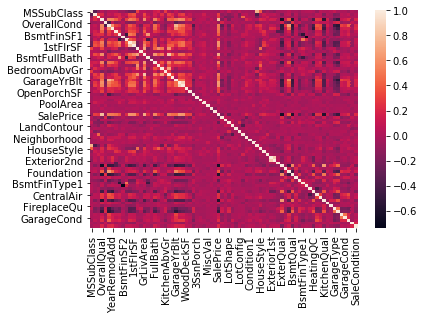

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#Removing te ID column directly,while reading only
#row=pd.read_csv('train.csv',nrows=1)
df_train=pd.read_csv('train.csv')
#row=pd.read_csv('test.csv',nrows=1)
df_test=pd.read_csv('test.csv')
print(df_train.shape)
print(df_test.shape)

#Dropping columns which are mostly filled with na
df_train=df_train.drop(['Id','Alley','PoolQC','Fence','MiscFeature'],axis='columns')
df_test=df_test.drop(['Id','Alley','PoolQC','Fence','MiscFeature'],axis='columns')
print(df_train.shape)

#filling missing values with bfill and ffill;Using both methods because 1st row or last row are left with using one method only
df_train=df_train.fillna(method='ffill')
df_train=df_train.fillna(method='bfill')
df_test=df_test.fillna(method='ffill')
df_test=df_test.fillna(method='bfill')
print(df_test.isnull().any().any())


#taking out only categoricals variable for encoding
from sklearn.preprocessing import LabelEncoder
categoricals=df_train.select_dtypes(exclude=[np.number])
print(categoricals)

#LabelEncoding categoricals variable
categoricalsLE=categoricals.apply(LabelEncoder().fit_transform)
print(categoricalsLE)


#Adding the labeled encoding columns to the main data
df_train=df_train.drop(categoricals,axis='columns')
df_test=df_test.drop(categoricals,axis='columns')


df_train=pd.concat([df_train,categoricalsLE],axis='columns')
df_test=pd.concat([df_test,categoricalsLE],axis='columns')#print(df_test)

import seaborn as sns

sns.heatmap(df_train.corr())



y=df_train['SalePrice']
df_train=df_train.drop('SalePrice',axis='columns')
print(y)
#

#FeatureScaling Why this part is not working,Ask it
from sklearn.preprocessing import StandardScaler
df_train.iloc[:,:]=StandardScaler().fit_transform(df_train.values)
df_test.iloc[:,:]=StandardScaler().fit_transform(df_test.values)





df_test=df_test.fillna(method='ffill')
df_test=df_test.fillna(method='bfill')
#print(df_train.shape)
#print(df_test.shape)
#print(df_train)
#print(df_train)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_train,y,test_size=0.2,random_state=0)
'''print(x_train)
print(y_train)
print(x_test)
print(y_test)'''

#Linear Regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
from sklearn.metrics import explained_variance_score
print('Linear Regression:',explained_variance_score(y_test,y_pred))
print('Linear Regression Score:',regressor.score(x_test,y_test))

#Feature Scaling works fine with SVR
#SVR
from sklearn.svm import SVR
regressor=SVR()
regressor.fit(x_train,y_train)
y_predSVR=regressor.predict(x_test)
from sklearn.metrics import explained_variance_score
print('Support Vector M:',explained_variance_score(y_test,y_predSVR))
print('Support VEctor Score:',regressor.score(x_test,y_test))


#DecisionTreeRegression
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(x_train,y_train)
y_predDTR=regressor.predict(x_test)
from sklearn.metrics import explained_variance_score
print('Decision tree:',explained_variance_score(y_test,y_predDTR))
print('Decision Tree Score:',regressor.score(x_test,y_test))


#RandomForestRegression
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
regressor.fit(x_train,y_train)
y_predRFR=regressor.predict(df_test)
from sklearn.metrics import explained_variance_score#print('Random Forest: ',explained_variance_score(y_test,y_predRFR))
print('Random FOrest Score:',regressor.score(x_test,y_test))


#K-Fold Cross Validation
'''from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,df_train,y,cv=10)
print(score.mean())'''

'''import statsmodels.api as sm
regressor_OLS=sm.OLS(y_train,x_train).fit()
print(regressor_OLS.summary())'''



'''
#BuildingOptimal MOdel/Backward Elimination/Removing independent variables

#print(df_test.shape)
#print(df_test)
#print(df_test.shape)
x_opt=x_train
regressor_OLS=sm.OLS(y,x_opt).fit()
print(regressor_OLS.summary())
x_opt=x_opt.drop(['HalfBath'],axis='columns')
#regressor_OLS=sm.OLS(y,x_opt).fit()
#print(regressor_OLS.summary())
x_opt=x_opt.drop(['CentralAir'],axis='columns')
#regressor_OLS=sm.OLS(y,x_opt).fit()
#print(regressor_OLS.summary())
x_opt=x_opt.drop(['GarageQual','Foundation'],axis='columns')
#regressor_OLS=sm.OLS(y,x_opt).fit()
#print(regressor_OLS.summary())
x_opt=x_opt.drop(['LowQualFinSF'],axis='columns')
#regressor_OLS=sm.OLS(y,x_opt).fit()
#print(regressor_OLS.summary())
x_opt=x_opt.drop(['BsmtHalfBath',],axis='columns')
#regressor_OLS=sm.OLS(y,x_opt).fit()
#print(regressor_OLS.summary())
x_opt=x_opt.drop(['EnclosedPorch','MiscVal','MoSold','LotConfig','ExterCond','Heating','GarageType'],axis='columns')
#regressor_OLS=sm.OLS(y,x_opt).fit()
#print(regressor_OLS.summary())
x_opt=x_opt.drop(['YearRemodAdd','GarageArea','Exterior2nd','BsmtFinType2','Electrical'],axis='columns')
#regressor_OLS=sm.OLS(y,x_opt).fit()
#print(regressor_OLS.summary())
x_opt=x_opt.drop(['BsmtUnfSF','GarageYrBlt','Condition1','PavedDrive','SaleType'],axis='columns')
#regressor_OLS=sm.OLS(y,x_opt).fit()
#print(regressor_OLS.summary())
x_opt=x_opt.drop(['3SsnPorch','PoolArea','MSZoning','GarageFinish'],axis='columns')
#regressor_OLS=sm.OLS(y,x_opt).fit()
#print(regressor_OLS.summary())
x_opt=x_opt.drop(['BsmtFinSF2','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','FullBath','OpenPorchSF','LotShape','Utilities','BldgType','BsmtCond','BsmtFinType1','HeatingQC','FireplaceQu','GarageCond'],axis='columns')
#regressor_OLS=sm.OLS(y,x_opt).fit()
#print(regressor_OLS.summary())
x_opt=x_opt.drop(['LotFrontage','BedroomAbvGr','HouseStyle','RoofStyle'],axis='columns')
#regressor_OLS=sm.OLS(y,x_opt).fit()
#print(regressor_OLS.summary())
x_opt=x_opt.drop(['Condition2'],axis='columns')
#regressor_OLS=sm.OLS(y,x_opt).fit()
#print(regressor_OLS.summary())
x_opt=x_opt.drop(['Exterior1st','BsmtFullBath','SaleCondition','LandSlope','LandContour','Functional','MasVnrType','KitchenAbvGr','Street','Neighborhood'],axis='columns')
#regressor_OLS=sm.OLS(y,x_opt).fit()
#print(regressor_OLS.summary())
#print(x_opt)



x_test=x_test.drop(['HalfBath','CentralAir','GarageQual','Foundation','LowQualFinSF','BsmtHalfBath','EnclosedPorch','MiscVal','MoSold','LotConfig','ExterCond','Heating','GarageType','YearRemodAdd','GarageArea','Exterior2nd','BsmtFinType2','Electrical','BsmtUnfSF','GarageYrBlt','Condition1','PavedDrive','SaleType','3SsnPorch','PoolArea','MSZoning','GarageFinish','BsmtFinSF2','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','FullBath','OpenPorchSF','LotShape','Utilities','BldgType','BsmtCond','BsmtFinType1','HeatingQC','FireplaceQu','GarageCond','LotFrontage','BedroomAbvGr','HouseStyle','RoofStyle','Condition2','Exterior1st','BsmtFullBath','SaleCondition','LandSlope','LandContour','Functional','MasVnrType','KitchenAbvGr','Street','Neighborhood'],axis='columns')
#print(x_opt.shape,df_test.shape)'''



#print(y_pred2)

#Below Code for converting CSV in a better format
df=pd.read_csv('test.csv')
df=df.iloc[:,0]

y_predRFR=pd.DataFrame(y_predRFR)
y_predRFR.drop(y_predRFR.tail(1).index,inplace=True)
y_predRFR.columns=['SalePrice']
df=pd.concat([df,y_predRFR],axis='columns')
print(df)
#df.to_csv('OLS23.csv',index=False)
